In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('temp_datalab_records_social_facebook.csv')

C:\Users\alexc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [8]:
data.time = pd.to_datetime(data.time)
data.drop(columns=['has_added_app','entity_id','cusip','isin'], inplace=True)

In [98]:
#because dataset_id and username is 1-1 related, we can fillin NaN username
data2 = data.copy()
namelist = data2.groupby('dataset_id')['username'].unique()
namelist = namelist.apply(lambda x: x[-1])
data2['fname'] = data2['dataset_id'].apply(lambda x: namelist.loc[x])
data2.drop(columns='username', axis=1, inplace=True)

In [108]:
data2.head()

,dataset_id,time,checkins,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,fname
0,53088,2015-01-01 05:00:00,0,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,SodaStream
1,52642,2015-01-01 05:00:00,148,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,ANSYSInc
2,53656,2015-01-01 05:00:00,0,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,MyAquaAmerica
3,53033,2015-01-01 05:00:00,173,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,Qualcomm
4,52783,2015-01-01 05:00:00,0,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,eaglepharmaceuticals


In [285]:
#rank likes
data2.groupby('fname')['likes'].max().sort_values(ascending = False)[0:10]

fname
facebook            210641077
youtube              83878678
McDonalds            78045025
McDonaldsUS          78015575
manchesterunited     74056498
natgeotvUS           62886557
KFC                  51635735
Disney               51257464
netflix              48638501
wwe                  39201249
Name: likes, dtype: int64

In [115]:
data_facebook = data2[data2['fname']=='facebook']
data_facebook.index = data_facebook['time']

In [119]:
data_facebook.head()

,dataset_id,time,checkins,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,fname
time,,,,,,,,,,
2015-07-21 04:00:00,56196,2015-07-21 04:00:00,12,0,163817897,318998,20531316728,NaN,2017-02-14 08:51:20.348641+00,facebook
2015-07-23 04:00:00,56196,2015-07-23 04:00:00,12,0,163848071,262457,20531316728,NaN,2017-02-14 08:51:20.356564+00,facebook
2015-07-24 04:00:00,56196,2015-07-24 04:00:00,12,0,163849170,262457,20531316728,NaN,2017-02-14 08:51:20.366303+00,facebook
2015-07-25 04:00:00,56196,2015-07-25 04:00:00,12,0,163872762,260454,20531316728,NaN,2017-02-14 08:51:20.379993+00,facebook
2015-07-26 04:00:00,56196,2015-07-26 04:00:00,12,0,163876280,266071,20531316728,NaN,2017-02-14 08:51:20.395526+00,facebook


In [136]:
data_facebook['likeincrease'] = data_facebook['likes'].diff()

C:\Users\alexc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


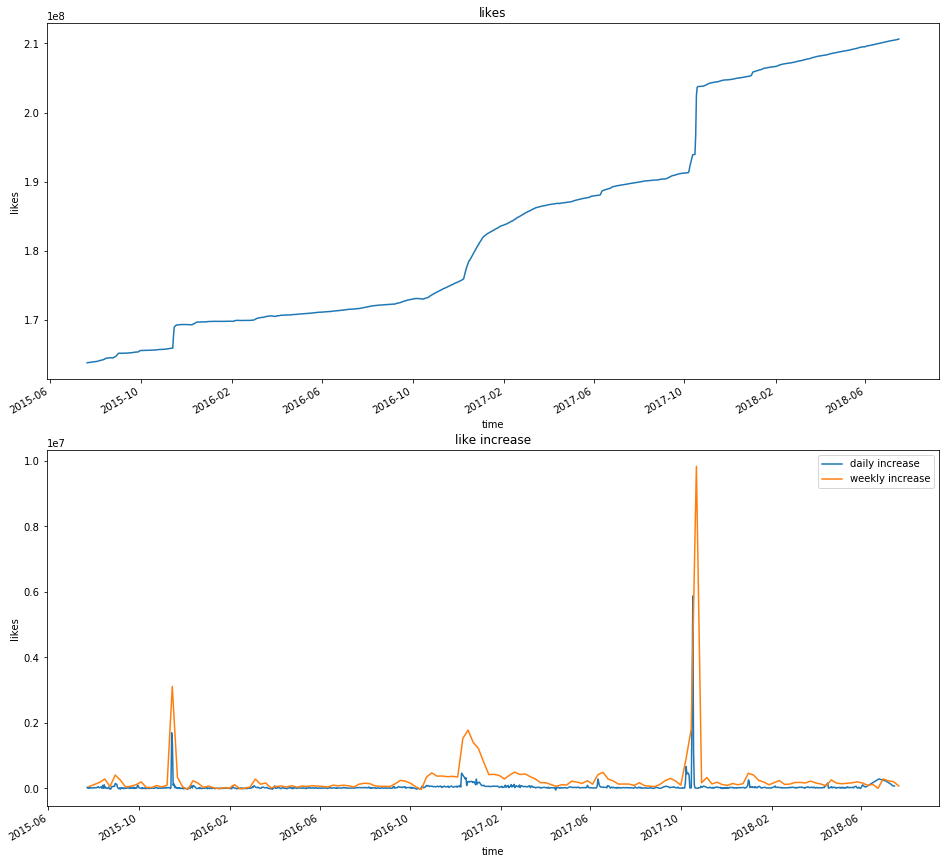

In [162]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
data_facebook.likes.plot()
plt.title('likes')
plt.xlabel('time')
plt.ylabel('likes')


fbweekly = data_facebook.resample('W')['likeincrease'].sum()
plt.subplot(2,1,2)
data_facebook.likeincrease.plot(label = 'daily increase')
plt.title('like increase')
plt.xlabel('time')
plt.ylabel('likes')

fbweekly.plot(label='weekly increase')
plt.legend(loc = 'best')

In [170]:
print ('Weeks that like number spikes are:')
fbweekly.sort_values(ascending=False)[0:4]

Weeks that like number spikes are:


time
2017-10-22    9837228.0
2015-11-15    3113606.0
2017-10-15    1804232.0
2016-12-18    1777875.0
Name: likeincrease, dtype: float64

In [286]:
#rank checkins , see top checkin places
data2.groupby('fname')['checkins'].max().sort_values(ascending=False)[0:10]

fname
Disneyland              17290550
WaltDisneyWorld          6547775
DisneylandParisfr        4487255
TheGarden                3651157
empirestatebuilding      2960168
KnottsBerryFarm          2947001
SeaWorld                 2916920
BuschGardensTampaBay     2745204
cedarpoint               1684933
wynnlasvegas             1338883
Name: checkins, dtype: int64

C:\Users\alexc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\alexc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\alexc\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


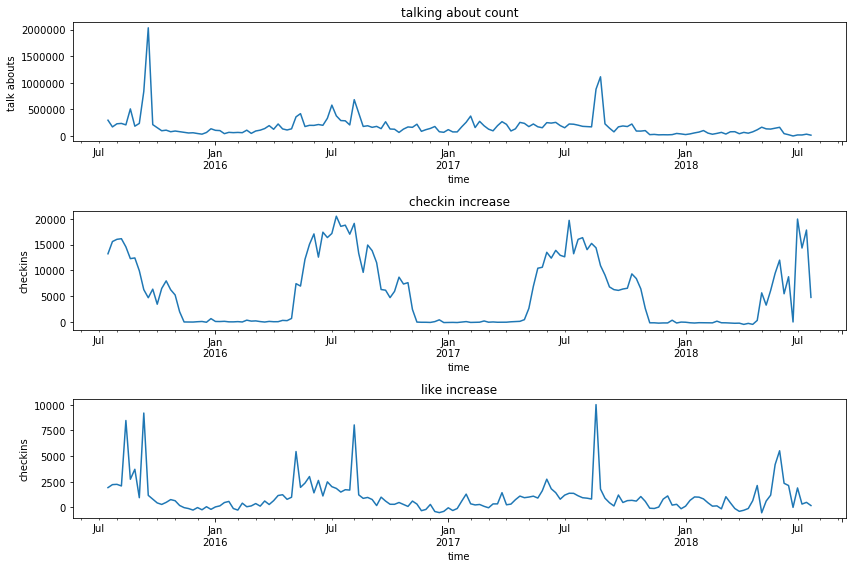

In [287]:
#talkabout count vs checkins
#pick one place and analyze
placename = 'cedarpoint'

df = data2[data2.fname == placename]
df['checkin_increase'] = df['checkins'].diff()
df['like_increase'] = df['likes'].diff()
df.index = df.time
df.drop(columns='time', inplace=True)

dfweekly = df.resample('W').sum()

plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
dfweekly['talking_about_count'].plot()
plt.title('talking about count')
plt.xlabel('time')
plt.ylabel('talk abouts')


plt.subplot(3,1,2)
dfweekly['checkin_increase'].plot()
plt.title('checkin increase')
plt.xlabel('time')
plt.ylabel('checkins')

plt.subplot(3,1,3)
dfweekly['like_increase'].plot()
plt.title('like increase')
plt.xlabel('time')
plt.ylabel('checkins')
plt.tight_layout()